# Model Evaluation & Tuning on Student Performance Dataset

### Load and Understand the Dataset
- Load the Student Performance dataset from Kaggle.
- Perform basic EDA: check for missing values, data types, unique values, etc.
- Identify target variable (usually something like final grade or pass/fail).

In [1]:
# 📦 Step 1: Import Libraries
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, roc_auc_score, RocCurveDisplay
)

# Saving model
import pickle

# Silence warnings
import warnings
warnings.filterwarnings('ignore')


# 📥 Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\Yogesh Verma\Desktop\Educational Content\intern project\task6\StudentsPerformance.csv")  # Adjust filename as needed
df.head()

# 🔎 Step 3: Basic EDA
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.nunique())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

## Preprocess the Data
- Encode categorical variables using OneHotEncoder or LabelEncoder.
- Normalize/scale numerical features.
- Handle missing values if any.
- Split into training and testing sets.

In [2]:
# 🧹 Step 4: Preprocessing
# Define target variable - e.g., Pass/Fail
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)  # you can change the threshold

# Drop the individual score columns if needed
df.drop(['math score', 'reading score', 'writing score', 'average_score'], axis=1, inplace=True)

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split features and target
from sklearn.preprocessing import StandardScaler
X = df_encoded.drop('pass', axis=1)
y = df_encoded['pass']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# rain-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



### Try Multiple Models
Train and compare at least 4 of the following:
- Logistic Regression
- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)
- SVM
- XGBoost (optional if allowed)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.36      0.15      0.21        27
           1       0.88      0.96      0.92       173

    accuracy                           0.85       200
   macro avg       0.62      0.55      0.56       200
weighted avg       0.81      0.85      0.82       200


Model: Random Forest
              precision    recall  f1-score   support

           0       0.50      0.11      0.18        27
           1       0.88      0.98      0.93       173

    accuracy                           0.86       200
   macro avg       0.69      0.55      0.55       200
we

<Figure size 1000x800 with 0 Axes>

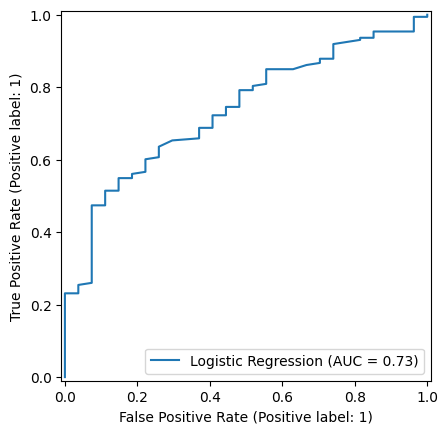

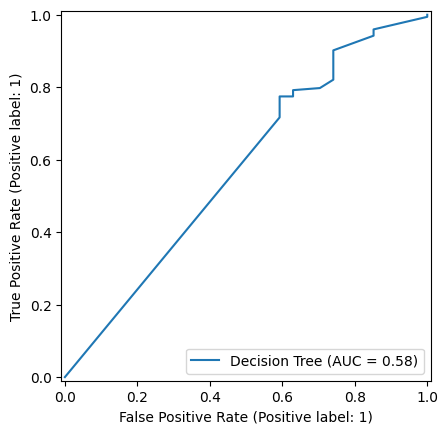

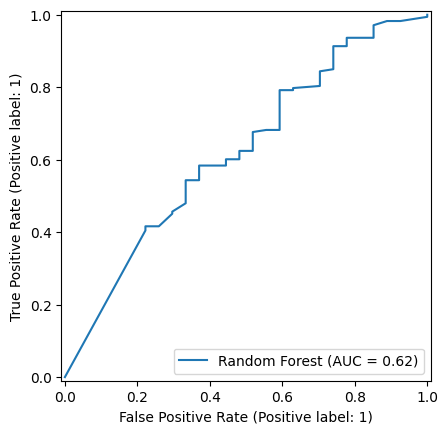

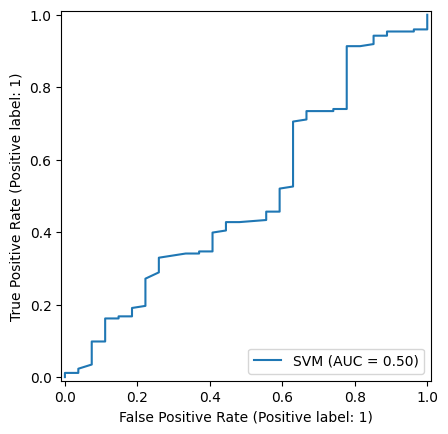

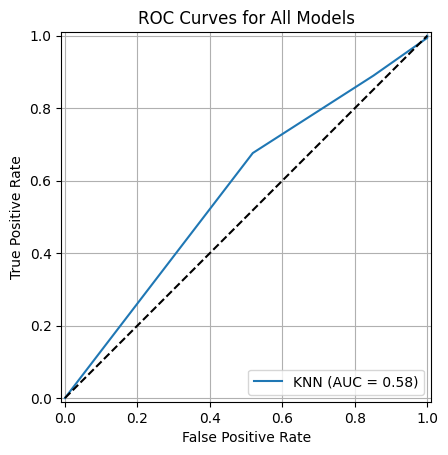


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



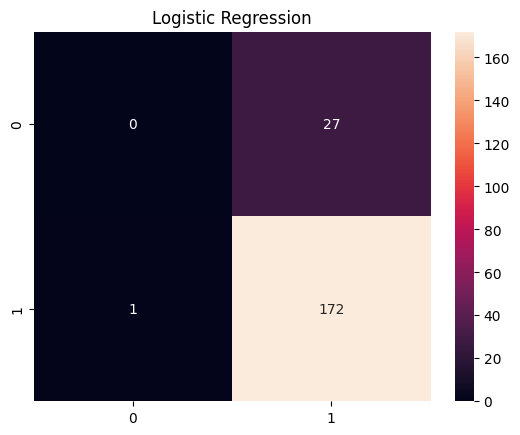


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.36      0.15      0.21        27
           1       0.88      0.96      0.92       173

    accuracy                           0.85       200
   macro avg       0.62      0.55      0.56       200
weighted avg       0.81      0.85      0.82       200



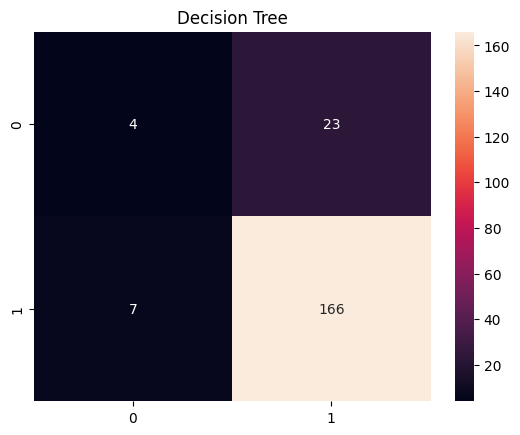


Model: Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



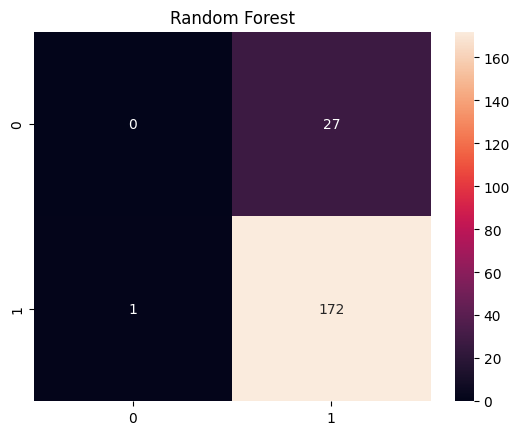


Model: SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



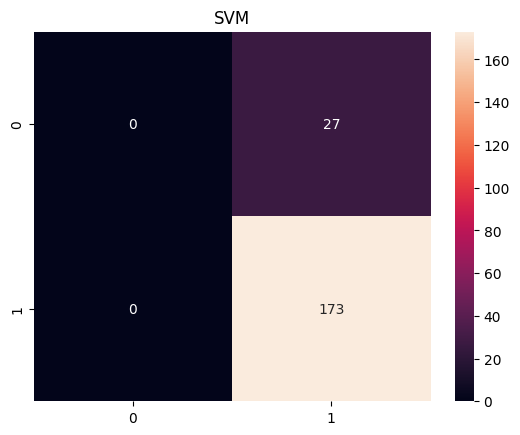


Model: KNN
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



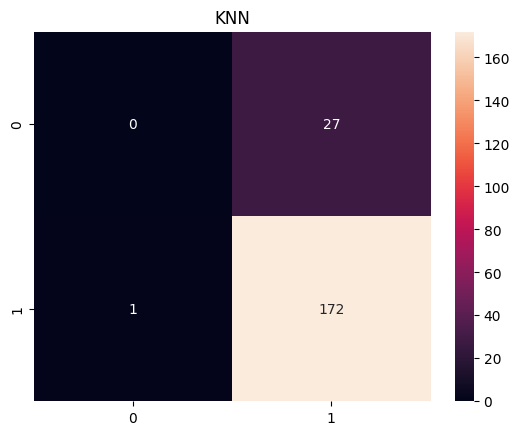

In [3]:


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

results = []

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # For SVM if no predict_proba available
        y_proba = model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # scale to 0–1

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append([name, acc, f1, roc_auc])
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))

    RocCurveDisplay.from_predictions(y_test, y_proba, name=name)
    
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    results.append([name, acc, f1, roc_auc])
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(name)
    plt.show()


###  Inference from ROC Curves

| Model               | AUC Score | ROC Curve Interpretation                 |
| ------------------- | --------- | ---------------------------------------- |
| Logistic Regression | **0.73**  | 🔝 Best performer, good class separation |
| Random Forest       | 0.62      | Moderate, room for improvement           |
| Decision Tree       | 0.58      | Low performance, likely overfitting      |
| KNN                 | 0.58      | Low discriminative power                 |
| SVM                 | 0.50      | 🚨 No better than random guessing        |


### Inference from Confusion Matrices
| Model               | TN | FP | FN | TP  | Notes                             |
| ------------------- | -- | -- | -- | --- | --------------------------------- |
| Logistic Regression | 0  | 27 | 1  | 172 | High TP, poor fail detection      |
| Decision Tree       | 4  | 23 | 7  | 166 | Slightly better fail detection    |
| Random Forest       | 0  | 27 | 1  | 172 | Same as logistic, needs tuning    |
| SVM                 | 0  | 27 | 0  | 173 | Always predicts pass – poor model |
| KNN                 | 0  | 27 | 1  | 172 | Same issue, needs balancing       |



## Evaluate Models
Use metrics:

- Accuracy
- F1-Score
- ROC-AUC
- Use classification_report, confusion_matrix, and roc_curve.

In [4]:
# 📊 Step 6: Compare Results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "ROC-AUC"])
print(results_df.sort_values(by="F1 Score", ascending=False))


                 Model  Accuracy  F1 Score   ROC-AUC
8                  SVM     0.865  0.927614  0.499037
3                  SVM     0.865  0.927614  0.500963
2        Random Forest     0.865  0.926431  0.621923
0  Logistic Regression     0.860  0.924731  0.734960
5  Logistic Regression     0.860  0.924731  0.734960
4                  KNN     0.860  0.924731  0.576001
9                  KNN     0.860  0.924731  0.576001
7        Random Forest     0.860  0.924731  0.613680
1        Decision Tree     0.850  0.917127  0.577071
6        Decision Tree     0.850  0.917127  0.577071


In [5]:
# 🔍 Step 7: Hyperparameter Tuning (Example: Random Forest)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score (F1):", grid.best_score_)

best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nTuned Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Score (F1): 0.9494391716997411

Tuned Random Forest Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



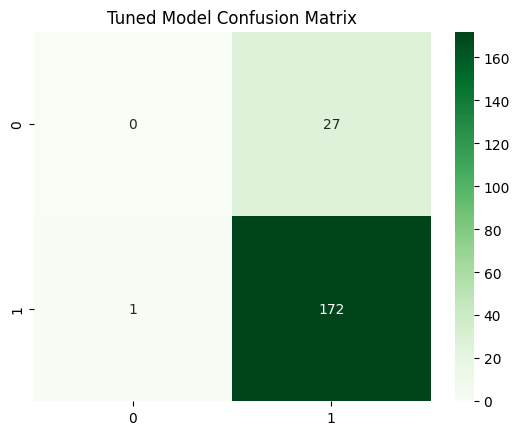

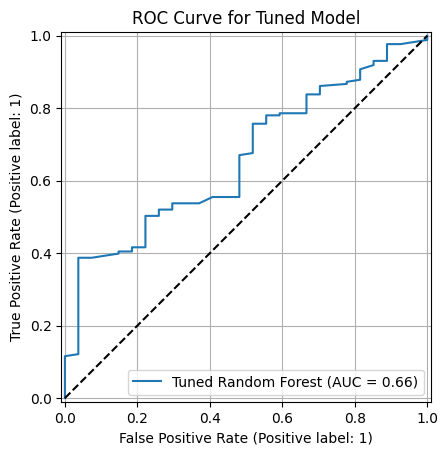

In [6]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_best))

sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Greens')
plt.title("Tuned Model Confusion Matrix")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_proba_best, name='Tuned Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Tuned Model')
plt.grid(True)
plt.show()


In [7]:

with open("best_student_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Model saved as 'best_student_model.pkl'")


✅ Model saved as 'best_student_model.pkl'
